# 02_04_numpymatrix.ipynb - Linear algebra and sparse matrices with NumPy and SciPy

In [1]:
import math

import numpy as np
import scipy.linalg as sl
import scipy.sparse as ss
import scipy.sparse.linalg as ssl
import matplotlib.pyplot as pp

#### Code from last video

In [2]:
def initphi(n=64):
    dx = 1/n
    xs = np.linspace(0.5*dx, 1-0.5*dx, n)
    
    phi = np.zeros((n,n), 'd')
    
    phi[:,-1] = np.sin(2 * math.pi * xs)
    phi[-1,:] = -np.sin(2 * math.pi * xs)
    
    return phi

In [3]:
def showphi(array, colorbar=True):
    pp.imshow(array.T, origin='lower', extent=(0,1,0,1),
              vmin=-1, vmax=1, cmap='coolwarm')
    
    if colorbar:
        pp.colorbar()

#### Statement of the linear algebra problem

$$A_{ijkl} y_{kl} = b_{ij} \quad \text{(summation implied)}$$

$$\biggl(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}\biggr) y_{kl} \rightarrow
\bigl(y_{(k-1)l} + y_{(k+1)l} + y_{k(l-1)} + y_{k(l+1)} - 4y_{kl}\bigr) / \Delta x^2$$

_In the bulk_:

$$A_{ijkl} = 0 \quad\text{except for}\quad A_{ij(i-1)j} = A_{ij(i+1)j} = A_{iji(j-1)} = A_{iji(j+1)} = (\Delta x)^{-2}$$

and

$$A_{ijij} = -4 (\Delta x)^{-2}$$

_On the boundary_:

$$A_{0j0j} = A_{(-1)j(-1)j} = A_{i0i0} = A_{i(-1)i(-1)} = 1.$$

#### Let's go!

In [4]:
def laplacematrix(n):
    A = np.zeros((n,n,n,n), 'd')

    dx = 1/n
    
    for i in range(1,n-1):
        for j in range(1,n-1):
            A[i,j,i-1,j] = A[i,j,i+1,j] = A[i,j,i,j-1] = A[i,j,i,j+1] = 1 / dx**2
            A[i,j,i,j] = -4 / dx**2

    for i in range(0,n):
        A[0,i,0,i] = A[-1,i,-1,i] = A[i,0,i,0] = A[i,-1,i,-1] = 1
        
    return A

In [5]:
n = 8
A = laplacematrix(n).reshape((n*n,n*n))

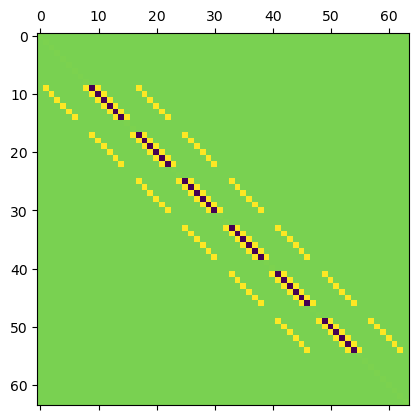

In [6]:
pp.matshow(A)

In [7]:
n = 64
A = laplacematrix(n).reshape((n*n,n*n))

In [8]:
b = initphi(n).reshape((n*n),)

In [9]:
%%time

ysol = np.linalg.solve(A, b)

CPU times: user 2.83 s, sys: 49 ms, total: 2.88 s
Wall time: 502 ms


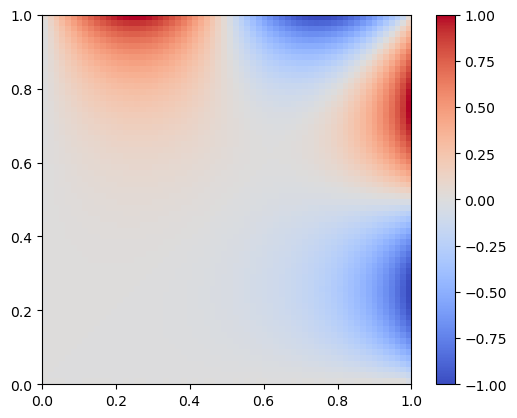

In [10]:
showphi(ysol.reshape((n,n)))

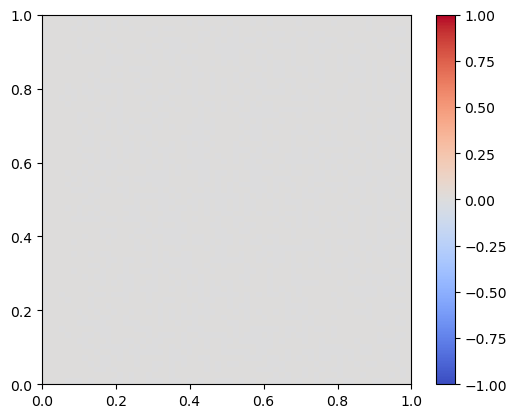

In [11]:
showphi( (np.dot(A, ysol) - b).reshape((n,n)) )

In [12]:
A @ ysol - b

array([ 0.00000000e+00,  2.11758237e-22, -3.15943289e-19, ...,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [13]:
np.max(np.abs(A @ ysol - b))

1.2732925824820995e-11

In [14]:
help(sl)

Help on package scipy.linalg in scipy:

NAME
    scipy.linalg

DESCRIPTION
    Linear algebra (:mod:`scipy.linalg`)
    
    .. currentmodule:: scipy.linalg
    
    Linear algebra functions.
    
    .. eventually, we should replace the numpy.linalg HTML link with just `numpy.linalg`
    
    .. seealso::
    
       `numpy.linalg <https://www.numpy.org/devdocs/reference/routines.linalg.html>`__
       for more linear algebra functions. Note that
       although `scipy.linalg` imports most of them, identically named
       functions from `scipy.linalg` may offer more or slightly differing
       functionality.
    
    
    Basics
    
    .. autosummary::
       :toctree: generated/
    
       inv - Find the inverse of a square matrix
       solve - Solve a linear system of equations
       solve_banded - Solve a banded linear system
       solveh_banded - Solve a Hermitian or symmetric banded system
       solve_circulant - Solve a circulant system
       solve_triangular - Solve a

In [15]:
A_s = ss.csc_matrix(A)

In [16]:
A_s

<4096x4096 sparse matrix of type '<class 'numpy.float64'>'
	with 19472 stored elements in Compressed Sparse Column format>

In [17]:
b_s = ss.csc_matrix(b)

In [ ]:
%time
ysol_s = ss.linalg.spsolve(A_s, b_s)

In [ ]:
b_s = ss.csc_matrix(b.reshape((n*n,1)))

In [ ]:
%time
ysol_s = ssl.spsolve(A_s, b_s)

In [ ]:
showphi(ysol_s.reshape((n,n)))